2348555 Lab Component

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load the dataset
df = pd.read_csv('/content/2015.csv')

In [3]:
# Exploring the dataset (getting top 5 rows)
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
# Shape of the dataset
df.shape

(158, 12)

The dataset has 158 rows and 12 columns.


In [5]:
# Checking for null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Thus no null values present in dataset.

In [6]:
# General stats of data
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
# Create bins for the 'Happiness Score' column
bins = [0, 4.5, 6.5, 10]
labels = ['Low Happiness', 'Medium Happiness', 'High Happiness']

# Categorize countries into bins
df['Happiness Score Group'] = pd.cut(df['Happiness Score'], bins=bins, labels=labels)


In [8]:
# One hot encoding
label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])



In [9]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df['Economy (GDP per Capita)'] = min_max_scaler.fit_transform(df['Economy (GDP per Capita)'].values.reshape(-1, 1))





In [10]:
# Perform a chi-square test
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(df['Region'], df['Happiness Rank'])

# Perform a chi-square test
chi2, pval, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results of the chi-square test
print(f"Chi-square: {chi2}")
print(f"p-value: {pval}")
print(f"Degrees of freedom: {dof}")




Chi-square: 1415.3258620689655
p-value: 0.4107040079831256
Degrees of freedom: 1404


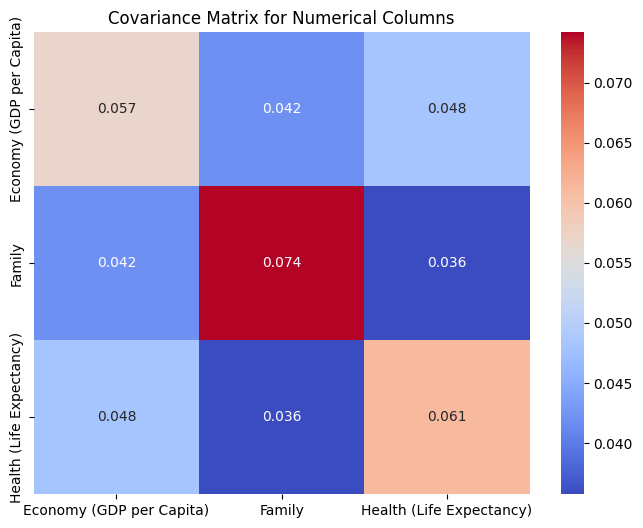

In [11]:
#covariance matrix
numerical_columns = ["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)"]

# Calculate the covariance matrix
covariance_matrix = df[numerical_columns].cov()

# Visualize the covariance matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm')
plt.title('Covariance Matrix for Numerical Columns')
plt.show()

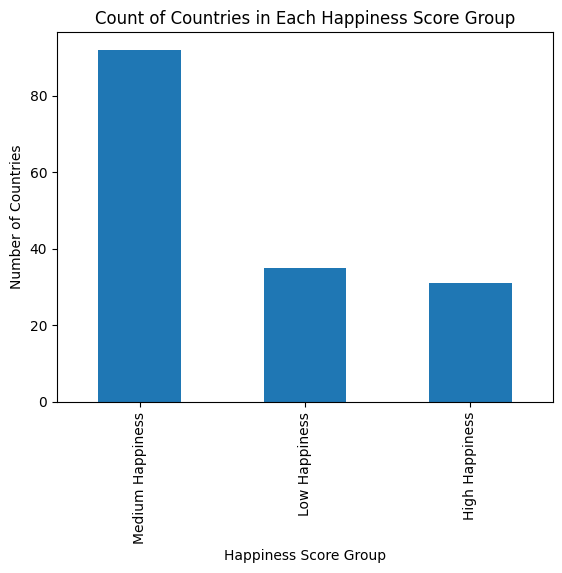

In [12]:
# Create a bar chart
df['Happiness Score Group'].value_counts().plot(kind='bar')
plt.xlabel('Happiness Score Group')
plt.ylabel('Number of Countries')
plt.title('Count of Countries in Each Happiness Score Group')
plt.show()




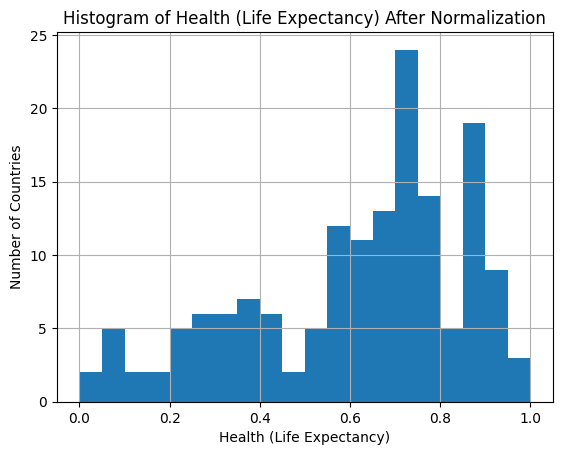

In [13]:
# Create a histogram
df['Health (Life Expectancy)'] = (df['Health (Life Expectancy)'] - df['Health (Life Expectancy)'].min()) / (df['Health (Life Expectancy)'].max() - df['Health (Life Expectancy)'].min())
df['Health (Life Expectancy)'].hist(bins=20)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Number of Countries')
plt.title('Histogram of Health (Life Expectancy) After Normalization')
plt.show()



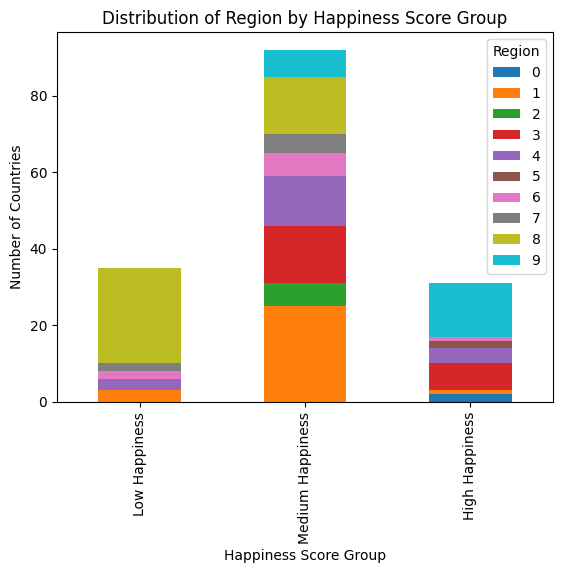

In [14]:
# Create a stacked bar chart
df = df.dropna()
df_grouped = df.groupby(['Happiness Score Group', 'Region'])['Country'].count().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Happiness Score Group')
plt.ylabel('Number of Countries')
plt.title('Distribution of Region by Happiness Score Group')
plt.show()



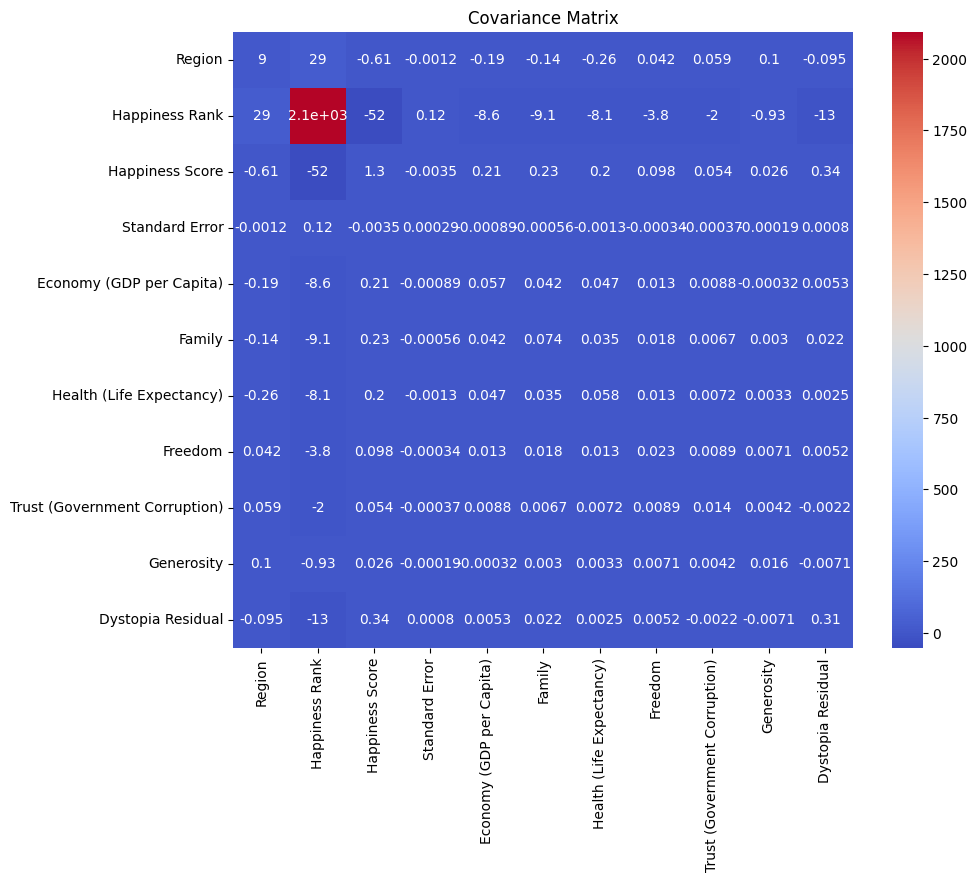

In [15]:
# Create a heatmap of the covariance matrix
covariance_matrix = df.select_dtypes(include=['number']).cov()
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm')
plt.title('Covariance Matrix')
plt.show()